In [1]:
from netCDF4 import Dataset, date2num
import xarray as xr
import os
import shutil
import rioxarray
import numpy as np
import pandas as pd
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import geopandas as gpd
import regionmask
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator
from datetime import datetime, timedelta
import datetime

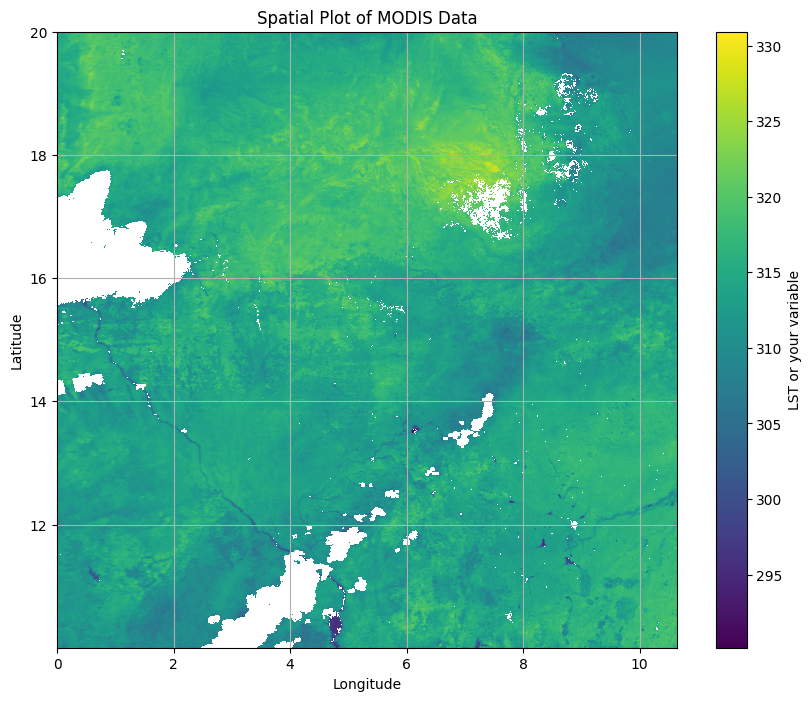

In [64]:
import matplotlib.pyplot as plt
ll=xr.open_dataset('MYD11A1.A2024001.h18v07.061.2024005005114.nc')
plt.figure(figsize=(10, 8))
plt.pcolormesh(ll.lon, ll.lat, ll.lst[0, :, :], shading='auto', cmap='viridis')
# plt.pcolormesh(ll.lon, ll.lat, ll.lst, shading='auto', cmap='viridis')
plt.colorbar(label='LST of your variable')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Plot of MODIS Data')
# plt.ylim(46.5, 50)
# plt.xlim(-59.5, -52.5)
plt.grid(True)
plt.show()

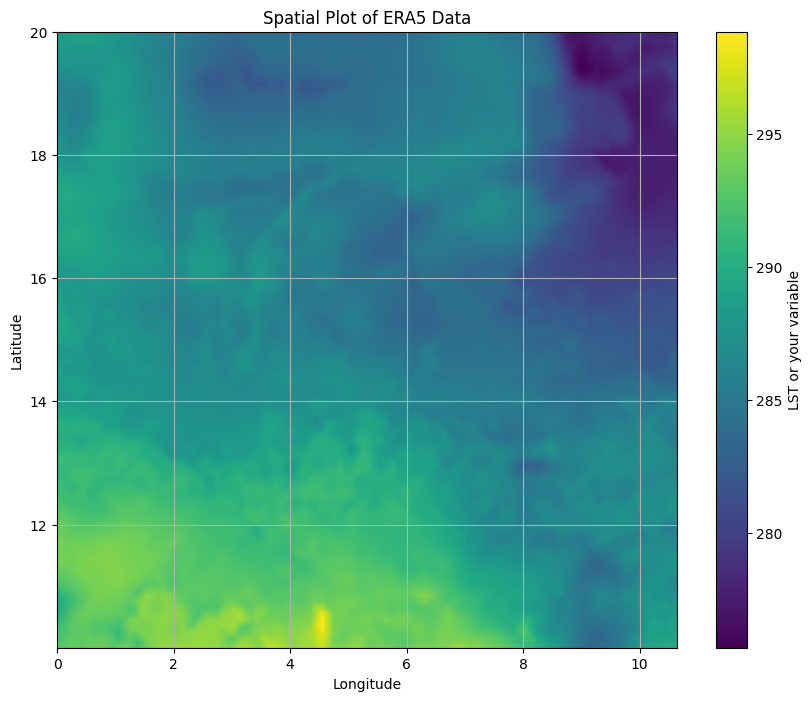

In [6]:
import matplotlib.pyplot as plt
ll=xr.open_dataset('era_data_int.nc')
plt.figure(figsize=(10, 8))
plt.pcolormesh(ll.lon, ll.lat, ll.skt[0, :, :], shading='auto', cmap='viridis')
# plt.pcolormesh(ll.lon, ll.lat, ll.lst, shading='auto', cmap='viridis')
plt.colorbar(label='LST of your variable')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Plot of ERA5 Data')
# plt.ylim(46.5, 50)
# plt.xlim(-59.5, -52.5)
plt.grid(True)
plt.show()

# Modis Data after QA Assessment

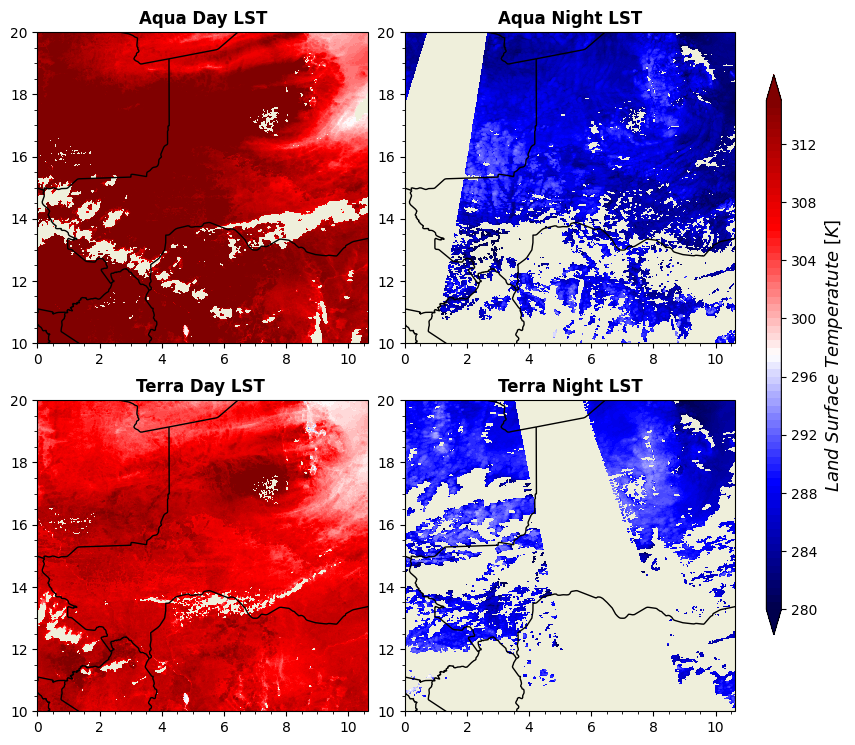

In [2]:
projection = ccrs.PlateCarree()
cmap='seismic'
title=["Aqua Day LST", "Aqua Night LST", "Terra Day LST ", "Terra Night LST"]
fig = plt.figure(figsize=(10, 8))
file_list=['new_proj/interp_era/code_file/MYD11A1_Day_Aqua_treated/MYD11A1.A2022001.h18v07.061.2022004025625.nc',
           'new_proj/interp_era/code_file/MYD11A1_Night_Aqua_treated/MYD11A1.A2022001.h18v07.061.2022004025625.nc',
           'new_proj/interp_era/code_file/MOD11A1_Day_Terra_treated/MOD11A1.A2022001.h18v07.061.2022004025009.nc', 
          'new_proj/interp_era/code_file/MOD11A1_Night_Terra_treated/MOD11A1.A2022001.h18v07.061.2022004025009.nc']

# level=np.arange(np.nanmin(data.lst_day.values), np.nanmax(data.lst_day.values)+0.5, 0.5)
# level=np.arange(np.nanmin(data.lst_day.values), np.nanmax(data.lst_day.values))

vmin = 280  # Minimum temperature (K)
vmax = 315  # Maximum temperature (K)
level = np.arange(vmin, vmax+0.5, 0.5)




for k in range(len(file_list)):
    data=xr.open_dataset(file_list[k])
    ax = fig.add_subplot(2, 2, k+1, projection=projection)
    var_name=list(data.data_vars)[0]
    mymap = ax.contourf(data.lon, data.lat, data[var_name][0, :, :], extend='both', cmap=cmap,levels=level)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    ax.add_feature(cfeature.LAND.with_scale('10m'))
    ax.add_feature(cfeature.OCEAN.with_scale('10m'))
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
    ax.set_title(title[k], fontweight="bold", fontsize=12)
    ax.set_xticks(np.arange(0, 11, 0.5), [str(i) for i in np.arange(0, 11, 0.5)])
    ax.set_yticks(np.arange(10, 20.5, 0.5), [str(i) for i in np.arange(10, 20.5, 0.5)])

plt.tight_layout(h_pad=+0.8, w_pad=-15, rect=[0, 0.056, 1, 1])
cbaxes = fig.add_axes([0.88, 0.20, 0.015, 0.70])
cbar = plt.colorbar(mymap, orientation='vertical', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$Land \ Surface \ Temperatute \ [K]$', rotation=90, fontsize=13, fontweight='bold')
plt.show()

# ERA5 Skin Temperature & ERA5 2M Temperature

['2022-01-01T14:00:00.000000000']
['2022-01-01T23:00:00.000000000']
['2022-01-01T14:00:00.000000000']
['2022-01-01T23:00:00.000000000']


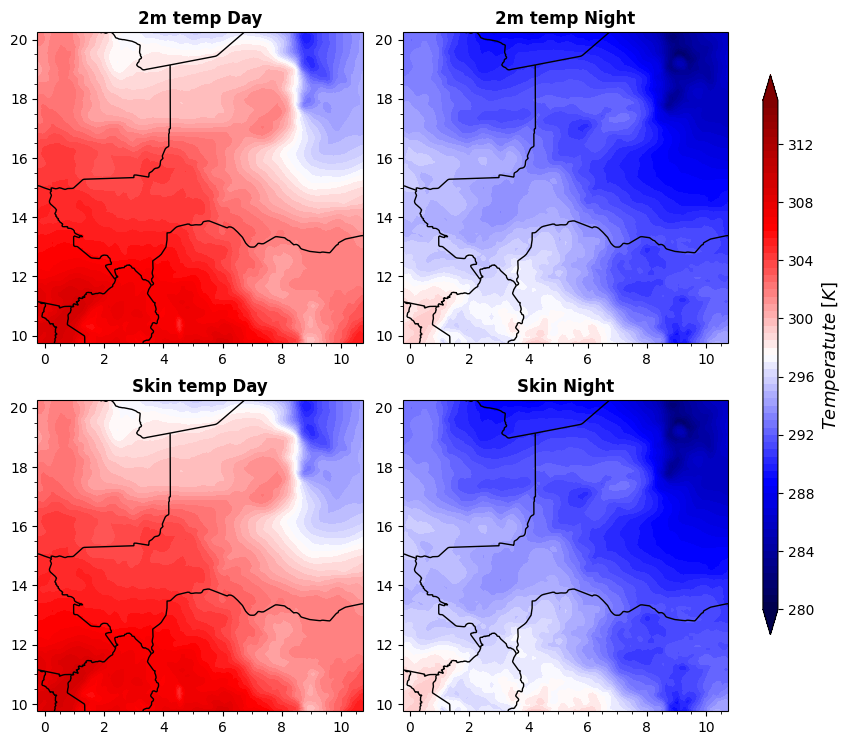

In [3]:
projection = ccrs.PlateCarree()
cmap='seismic'
title=["2m temp Day", "2m temp Night", "Skin temp Day", "Skin Night"]
fig = plt.figure(figsize=(10, 8))

temp=xr.open_dataset("new_proj/2m_temp_2001_2024_africa/2m_temp_2022_01.nc")
skin=xr.open_dataset("new_proj/2m_temp_2001_2024_africa/2m_temp_2022_01.nc")
data1=temp.where((temp.valid_time.dt.day==1)& (temp.valid_time.dt.hour==14), drop=True)
data2=temp.where((temp.valid_time.dt.day==1)& (temp.valid_time.dt.hour==23), drop=True)
data3=skin.where((skin.valid_time.dt.day==1)& (skin.valid_time.dt.hour==14), drop=True)
data4=skin.where((skin.valid_time.dt.day==1)& (skin.valid_time.dt.hour==23), drop=True)
file_list=[data1, data2, data3, data4]

for k in range(len(file_list)):
    data=file_list[k]
    print(data.valid_time.values)
    ax = fig.add_subplot(2, 2, k+1, projection=projection)
    var_name=list(data.data_vars)[0]
    mymap = ax.contourf(data.longitude, data.latitude, data[var_name][0, :, :], extend='both', cmap=cmap, levels=level)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    ax.add_feature(cfeature.LAND.with_scale('10m'))
    ax.add_feature(cfeature.OCEAN.with_scale('10m'))
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
    ax.set_title(title[k], fontweight="bold", fontsize=12)
    ax.set_xticks(np.arange(0, 11, 0.5), [str(i) for i in np.arange(0, 11, 0.5)])
    ax.set_yticks(np.arange(10, 20.5, 0.5), [str(i) for i in np.arange(10, 20.5, 0.5)])

plt.tight_layout(h_pad=+0.8, w_pad=-15, rect=[0, 0.056, 1, 1])
cbaxes = fig.add_axes([0.88, 0.20, 0.015, 0.70])
cbar = plt.colorbar(mymap, orientation='vertical', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$Temperatute \ [K]$', rotation=90, fontsize=13, fontweight='bold')
plt.show()

# Interpolation ERA5 2M Temperature

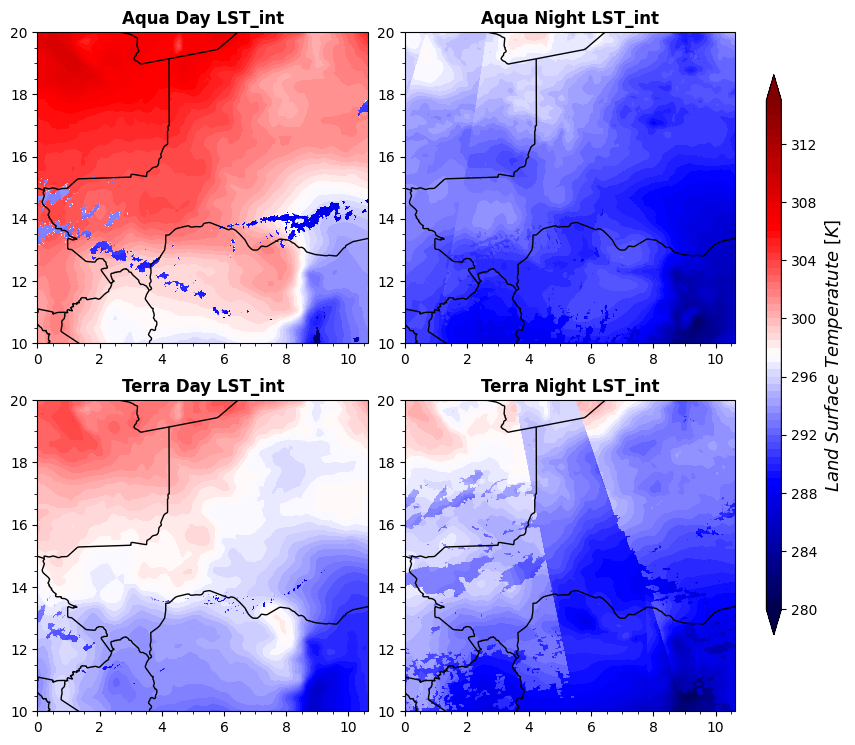

In [4]:
projection = ccrs.PlateCarree()
cmap='seismic'
title=["Aqua Day LST_int", "Aqua Night LST_int", "Terra Day LST_int", "Terra Night LST_int"]
fig = plt.figure(figsize=(10, 8))
file_list=["new_proj/interp_era/2m_interp_day_Aqua/MYD11A1.A2022001.h18v07.061.2022004025625_2m_interp.nc",
           "new_proj/interp_era/2m_interp_night_Aqua/MYD11A1.A2022001.h18v07.061.2022004025625_2m_interp.nc",         
           "new_proj/interp_era/2m_interp_day_Terra/MOD11A1.A2022001.h18v07.061.2022004025009_2m_interp.nc",
          "new_proj/interp_era/2m_interp_night_Terra/MOD11A1.A2022001.h18v07.061.2022004025009_2m_interp.nc",]

# level=np.arange(np.nanmin(data.lst_day.values), np.nanmax(data.lst_day.values)+0.5, 0.5)
for k in range(len(file_list)):
    data=xr.open_dataset(file_list[k])
    ax = fig.add_subplot(2, 2, k+1, projection=projection)
    var_name=list(data.data_vars)[0]
    mymap = ax.contourf(data.lon, data.lat, data[var_name][0, :, :], extend='both', cmap=cmap, levels=level)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    ax.add_feature(cfeature.LAND.with_scale('10m'))
    ax.add_feature(cfeature.OCEAN.with_scale('10m'))
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
    ax.set_title(title[k], fontweight="bold", fontsize=12)
    ax.set_xticks(np.arange(0, 11, 0.5), [str(i) for i in np.arange(0, 11, 0.5)])
    ax.set_yticks(np.arange(10, 20.5, 0.5), [str(i) for i in np.arange(10, 20.5, 0.5)])

plt.tight_layout(h_pad=+0.8, w_pad=-15, rect=[0, 0.056, 1, 1])
cbaxes = fig.add_axes([0.88, 0.20, 0.015, 0.70])
cbar = plt.colorbar(mymap, orientation='vertical', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$Land \ Surface \ Temperatute \ [K]$', rotation=90, fontsize=13, fontweight='bold')
plt.show()

# Interpolation ERA5 Skin Temperature

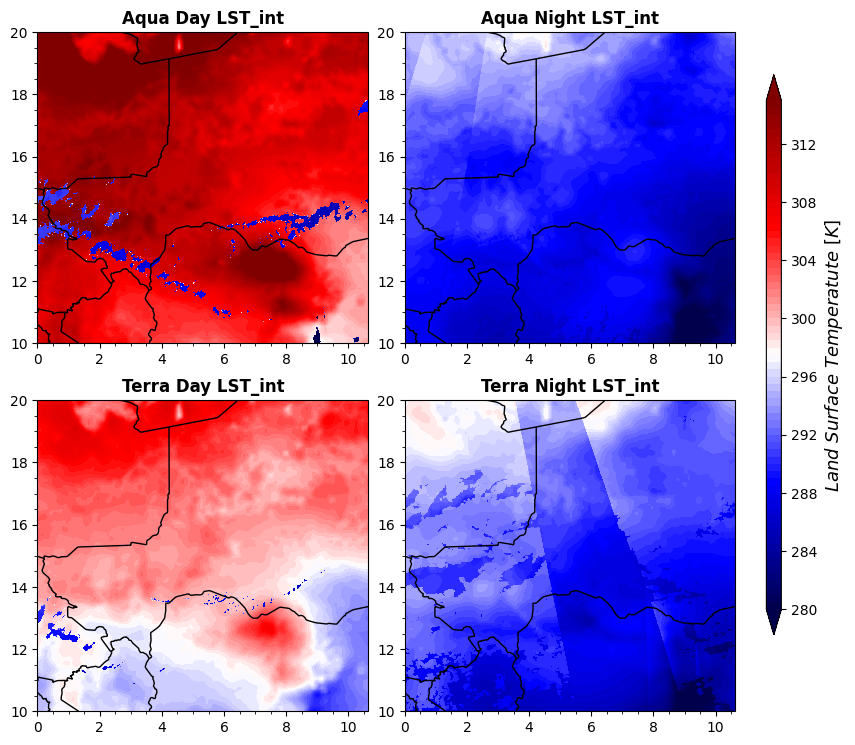

In [5]:
projection = ccrs.PlateCarree()
cmap='seismic'
title=["Aqua Day LST_int", "Aqua Night LST_int", "Terra Day LST_int", "Terra Night LST_int"]
fig = plt.figure(figsize=(10, 8))
file_list=["new_proj/interp_era/interp_day_Aqua/MYD11A1.A2022001.h18v07.061.2022004025625_skt_interp.nc",
           "new_proj/interp_era/interp_night_Aqua/MYD11A1.A2022001.h18v07.061.2022004025625_skt_interp.nc",         
           "new_proj/interp_era/interp_day_Terra/MOD11A1.A2022001.h18v07.061.2022004025009_skt_interp.nc",
          "new_proj/interp_era/interp_night_Terra/MOD11A1.A2022001.h18v07.061.2022004025009_skt_interp.nc",]

# level=np.arange(np.nanmin(data.lst_day.values), np.nanmax(data.lst_day.values)+0.5, 0.5)
for k in range(len(file_list)):
    data=xr.open_dataset(file_list[k])
    ax = fig.add_subplot(2, 2, k+1, projection=projection)
    var_name=list(data.data_vars)[0]
    mymap = ax.contourf(data.lon, data.lat, data[var_name][0, :, :], extend='both', cmap=cmap, levels=level)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    ax.add_feature(cfeature.LAND.with_scale('10m'))
    ax.add_feature(cfeature.OCEAN.with_scale('10m'))
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
    ax.set_title(title[k], fontweight="bold", fontsize=12)
    ax.set_xticks(np.arange(0, 11, 0.5), [str(i) for i in np.arange(0, 11, 0.5)])
    ax.set_yticks(np.arange(10, 20.5, 0.5), [str(i) for i in np.arange(10, 20.5, 0.5)])

plt.tight_layout(h_pad=+0.8, w_pad=-15, rect=[0, 0.056, 1, 1])
cbaxes = fig.add_axes([0.88, 0.20, 0.015, 0.70])
cbar = plt.colorbar(mymap, orientation='vertical', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$Land \ Surface \ Temperatute \ [K]$', rotation=90, fontsize=13, fontweight='bold')
plt.show()